In [1]:
import sqlite3
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


<h3>Historical Weather Data </h3>

In [6]:
# Database file name
database_name = "energy_data_NE.db"

# Table name to pull data from
table_name = "historical_weather_data"

# Connect to the SQLite database
conn = sqlite3.connect(database_name)

# Query to fetch data from the specified table
query = f"SELECT * FROM {table_name}"

columns_of_interest = ["temperature" ,'dwpt',"humidity", "precipitation",'wdir', "windspeed", 'pres',"cloudcover"]

# Execute the query and load the data into a pandas DataFrame
weather_data = pd.read_sql_query(query, conn)

x=weather_data[columns_of_interest]
print(x.head())


   temperature  dwpt  humidity  precipitation   wdir  windspeed    pres  \
0         15.0  15.0     100.0            0.0  150.0        7.6  1006.3   
1         15.6  15.6     100.0            0.0  200.0        5.4  1006.7   
2         15.6  15.6     100.0            0.0  200.0        5.4  1006.7   
3         17.2  17.2     100.0            0.0  200.0        7.6  1006.6   
4         16.1  16.1     100.0            0.0  170.0       13.0  1006.3   

   cloudcover  
0         5.0  
1         5.0  
2         5.0  
3         5.0  
4         4.0  


<h3>Solar Data</h3>

Far sighted model

   value
0      0
1      0
2      0
3      0
4      0
Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Best Score (Negative MSE) for XGBoost: -10083.167639797972


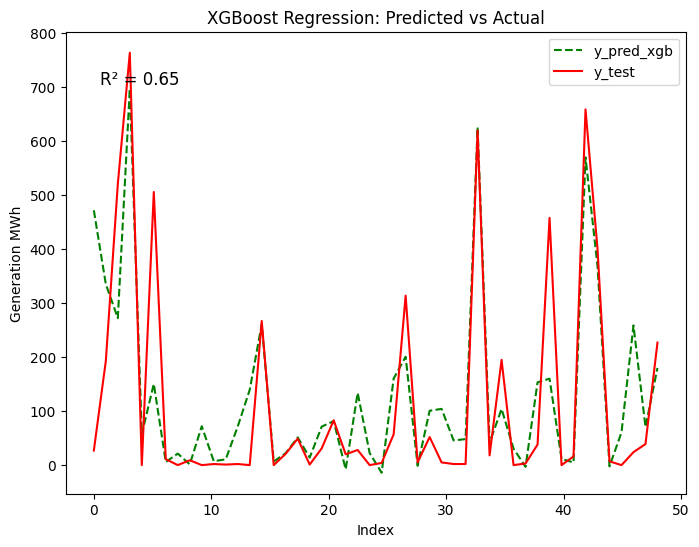

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
# Table name to pull data from
table_name = "SUN_data_NE"

# Connect to the SQLite database
conn = sqlite3.connect("energy_data_NE.db")

# Query to fetch data from the specified table
query = f"SELECT * FROM {table_name}"

# Execute the query and load the data into a pandas DataFrame
sun_data = pd.read_sql_query(query, conn)
y=sun_data[['value']]

print(y.head())

x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.3)
# Define a range of hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150],        # Number of boosting rounds
    'max_depth': [3, 5, 7],                # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],     # Learning rate (eta)
    'subsample': [0.8, 1.0],               # Subsampling ratio of training samples
    'colsample_bytree': [0.8, 1.0],        # Subsampling ratio of columns for each tree
}

x_test=x_test[:48]
y_test=y_test[:48]

xgboost_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV with cross-validation
grid_search_xgb = GridSearchCV(xgboost_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search_xgb.fit(x_train, y_train)

# Retrieve best parameters and best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print(f"Best Parameters for XGBoost: {best_params_xgb}")
print(f"Best Score (Negative MSE) for XGBoost: {best_score_xgb}")

# Train the XGBoost Regressor with the best parameters
best_xgb_model = grid_search_xgb.best_estimator_

# Predict y values using the test set
y_pred_xgb = best_xgb_model.predict(x_test)

r2_xgb = r2_score(y_test, y_pred_xgb)

linspace = np.linspace(0, len(y_test), len(y_test))

plt.figure(figsize=(8, 6))

plt.plot(linspace, y_pred_xgb, label="y_pred_xgb", color="green", linestyle = "--")

plt.plot(linspace, y_test, label="y_test", color="red")

plt.text(0.5, max(y_pred_xgb), f'R² = {r2_xgb:.2f}', fontsize=12, verticalalignment="bottom")

plt.title("XGBoost Regression: Predicted vs Actual")
plt.xlabel("Index")
plt.ylabel("Generation MWh")
plt.legend()

plt.show()


Short sighted model

In [12]:
x=x[:336]
print(x.head())

   temperature  dwpt  humidity  precipitation   wdir  windspeed    pres  \
0         15.0  15.0     100.0            0.0  150.0        7.6  1006.3   
1         15.6  15.6     100.0            0.0  200.0        5.4  1006.7   
2         15.6  15.6     100.0            0.0  200.0        5.4  1006.7   
3         17.2  17.2     100.0            0.0  200.0        7.6  1006.6   
4         16.1  16.1     100.0            0.0  170.0       13.0  1006.3   

   cloudcover  
0         5.0  
1         5.0  
2         5.0  
3         5.0  
4         4.0  


<h3>WIND data</h3>

In [ ]:

# Table name to pull data from
table_name = "WND_data_NE"

# Connect to the SQLite database
conn = sqlite3.connect(database_name)

# Query to fetch data from the specified table
query = f"SELECT * FROM {table_name}"

# Execute the query and load the data into a pandas DataFrame
wind_data = pd.read_sql_query(query, conn)


<h3>Natural Gas data</h3>

In [5]:

# Table name to pull data from
table_name = "NG_data_NE"

# Connect to the SQLite database
conn = sqlite3.connect(database_name)

# Query to fetch data from the specified table
query = f"SELECT * FROM {table_name}"

# Execute the query and load the data into a pandas DataFrame
NG_data = pd.read_sql_query(query, conn)
